In [1]:
import sys
import matplotlib.pyplot as plt
import numpy as np
from porespy import generators
from tomo_encoders.misc_utils.feature_maps_vis import view_midplanes
import cupy as cp
import time
import h5py
from tomopy import project
sys.path.append('/data02/MyArchive/aisteer_3Dencoders/TomoEncoders/tomo_encoders/tasks/sparse_segmenter/')
from recon_subvol import fbp_filter, test_recon_patch
from tomo_encoders import DataFile, Patches
import os
import signal
import tomocg as pt

### Read projections data  

In [2]:
filename = 'mli_L206_HT_650_L3'
projs_path = '/data02/MyArchive/AM_part_Xuan/projs' 
binning = 1 
ntheta = 3000

In [3]:
# z, y, x
point = [500, 2000, 2000]
width = [64, 256, 256]
sz = slice(point[0], point[0] + width[0])

In [4]:
read_fpath = os.path.join(projs_path, filename + '_projs_bin%i_ntheta%i.hdf5'%(binning,ntheta))
with h5py.File(read_fpath, 'r') as hf:
    projs = np.asarray(hf['data'][:,sz,:])
    theta = np.asarray(hf['theta'][:])
    center = float(np.asarray(hf['center'][()]))

## Reconstruct one full slice  

In [5]:
vol_shape = projs.shape[1:] + (projs.shape[-1],)
vol_shape

(64, 4200, 4200)

In [6]:
with cp.cuda.Device(0):
    center = projs.shape[-1]//2.0
    sub_vol = test_recon_patch(projs, theta, center, point, width, apply_fbp=True)
    sub_vol = 1.0*(sub_vol - sub_vol.min()) / (sub_vol.max() - sub_vol.min())
    print("shape of sub_vol: ", sub_vol.shape)

(3000, 64, 6304)
norm =  4590.606
None
0.0010149478912353516
shape of sub_vol:  (64, 256, 256)


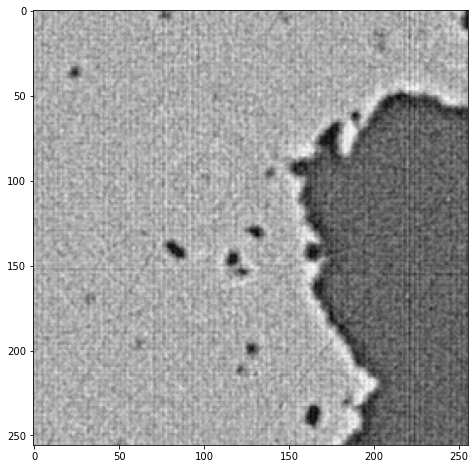

In [7]:
fig, ax = plt.subplots(1,1, figsize = (8,8))
ax.imshow(sub_vol[0], cmap = 'gray')

array([<AxesSubplot:title={'center':'XY mid-plane'}>,
       <AxesSubplot:title={'center':'XZ mid-plane'}>,
       <AxesSubplot:title={'center':'YZ mid-plane'}>], dtype=object)

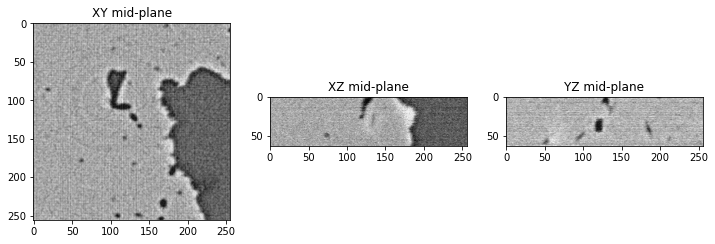

In [8]:
fig, ax = plt.subplots(1,3, figsize = (12,6))
view_midplanes(sub_vol, ax = ax)